In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [3]:
dfg = pd.read_csv('wat-good-time-interval-100.csv')
dfm = pd.read_csv('wat-mal-time-interval-100.csv')

In [4]:
dfg

,time_intervals,r0,r1,r2,r3,r4,r5,r6,r7,r8,...,inport_north,inport_south,inport_east,inport_west,outport_local,outport_north,outport_south,outport_east,outport_west,target
0,100,6,1,1,1,5,5,5,6,0,...,5,15,1,3,6,1,3,5,15,1
1,200,6,0,0,0,6,0,0,0,6,...,10,0,2,0,6,2,0,10,0,1
2,300,6,1,1,0,5,5,6,0,0,...,5,10,1,2,6,1,2,5,10,1
3,400,6,1,1,1,5,5,5,6,0,...,5,15,1,3,6,1,3,5,15,1
4,500,7,2,0,0,5,6,0,0,0,...,5,5,1,2,7,1,2,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31524,3152500,6,6,0,0,0,0,0,0,0,...,0,6,0,0,6,0,0,0,6,1
31525,3152600,7,7,7,0,0,0,0,0,0,...,0,2,0,12,7,0,12,0,2,1
31526,3152700,11,11,11,0,0,0,6,0,0,...,0,10,6,12,11,6,12,0,10,1
31527,3152800,6,0,0,0,6,6,6,0,0,...,6,12,0,0,6,0,0,6,12,1


In [5]:
dfm

,time_intervals,r0,r1,r2,r3,r4,r5,r6,r7,r8,...,inport_north,inport_south,inport_east,inport_west,outport_local,outport_north,outport_south,outport_east,outport_west,target
0,100,7,8,1,1,5,11,5,6,0,...,20,16,4,3,12,5,3,20,16,0
1,200,6,6,0,0,7,5,0,0,12,...,20,0,4,5,12,3,6,20,0,0
2,300,6,7,2,0,5,10,7,0,0,...,20,15,4,3,13,4,2,20,15,0
3,400,6,7,2,2,5,5,5,7,0,...,5,15,2,5,12,2,5,5,15,0
4,500,7,8,1,0,5,11,5,5,0,...,10,15,1,3,13,1,3,10,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31512,3151300,6,6,6,6,0,0,0,7,0,...,0,0,6,18,6,6,18,0,1,0
31513,3151400,9,2,0,0,6,6,6,5,0,...,6,18,0,2,8,0,3,6,17,0
31514,3151500,9,10,0,0,0,0,0,0,0,...,0,6,0,4,10,0,3,0,6,0
31515,3151600,6,6,6,0,0,0,0,0,0,...,0,0,0,12,6,0,12,0,0,0


In [7]:
df = dfg.append(dfm, ignore_index=True)
df = df.sort_values('time_intervals')

In [8]:
df.to_csv('wat-time-pca-100.csv',index=False)
df = pd.read_csv("wat-time-pca-100.csv")
df

,time_intervals,r0,r1,r2,r3,r4,r5,r6,r7,r8,...,inport_north,inport_south,inport_east,inport_west,outport_local,outport_north,outport_south,outport_east,outport_west,target
0,100,6,1,1,1,5,5,5,6,0,...,5,15,1,3,6,1,3,5,15,1
1,100,7,8,1,1,5,11,5,6,0,...,20,16,4,3,12,5,3,20,16,0
2,200,6,6,0,0,7,5,0,0,12,...,20,0,4,5,12,3,6,20,0,0
3,200,6,0,0,0,6,0,0,0,6,...,10,0,2,0,6,2,0,10,0,1
4,300,6,1,1,0,5,5,6,0,0,...,5,10,1,2,6,1,2,5,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63041,3152500,6,6,0,0,0,0,0,0,0,...,0,6,0,0,6,0,0,0,6,1
63042,3152600,7,7,7,0,0,0,0,0,0,...,0,2,0,12,7,0,12,0,2,1
63043,3152700,11,11,11,0,0,0,6,0,0,...,0,10,6,12,11,6,12,0,10,1
63044,3152800,6,0,0,0,6,6,6,0,0,...,6,12,0,0,6,0,0,6,12,1


In [9]:
df.corr()

,time_intervals,r0,r1,r2,r3,r4,r5,r6,r7,r8,...,inport_north,inport_south,inport_east,inport_west,outport_local,outport_north,outport_south,outport_east,outport_west,target
time_intervals,1.000000,0.093290,-0.012849,0.011736,0.005416,0.082749,0.004555,0.026973,0.040763,0.078900,...,0.045741,0.017659,0.084702,0.045343,0.053308,0.085861,0.046415,0.045768,0.017681,0.000330
r0,0.093290,1.000000,0.653889,0.507160,0.340777,0.661897,0.379204,0.325477,0.262398,0.503852,...,0.582999,0.594529,0.482721,0.529766,0.939613,0.491962,0.548348,0.566045,0.576227,-0.003530
r1,-0.012849,0.653889,1.000000,0.750968,0.526911,0.068831,0.317016,0.276059,0.269963,0.031960,...,0.117839,0.417066,0.429038,0.750239,0.699315,0.448013,0.736740,0.118581,0.429987,-0.031543
r2,0.011736,0.507160,0.750968,1.000000,0.701754,0.027827,0.037948,0.343140,0.352931,0.004822,...,0.047455,0.407609,0.376271,0.806957,0.538435,0.392350,0.786028,0.049323,0.433140,-0.009298
r3,0.005416,0.340777,0.526911,0.701754,1.000000,0.004526,0.022720,0.011406,0.508766,-0.010799,...,0.013963,0.361163,0.251580,0.688074,0.377834,0.262995,0.660620,0.015933,0.390455,-0.006043
r4,0.082749,0.661897,0.068831,0.027827,0.004526,1.000000,0.349372,0.248422,0.151741,0.778664,...,0.812326,0.512715,0.354242,0.068810,0.665000,0.335248,0.068637,0.815389,0.488248,-0.003693
r5,0.004555,0.379204,0.317016,0.037948,0.022720,0.349372,1.000000,0.398816,0.250118,0.042090,...,0.256095,0.340630,0.313552,0.179492,0.436844,0.309670,0.170792,0.268189,0.339310,-0.026236
r6,0.026973,0.325477,0.276059,0.343140,0.011406,0.248422,0.398816,1.000000,0.267795,0.018470,...,0.158409,0.323630,0.351047,0.337869,0.361399,0.348219,0.321891,0.169694,0.337808,-0.006352
r7,0.040763,0.262398,0.269963,0.352931,0.508766,0.151741,0.250118,0.267795,1.000000,0.014883,...,0.100088,0.292109,0.379882,0.538782,0.301783,0.378665,0.520082,0.109496,0.313705,-0.004051
r8,0.078900,0.503852,0.031960,0.004822,-0.010799,0.778664,0.042090,0.018470,0.014883,1.000000,...,0.820725,0.418875,0.361347,0.035921,0.518442,0.335154,0.034926,0.839982,0.399965,-0.000416


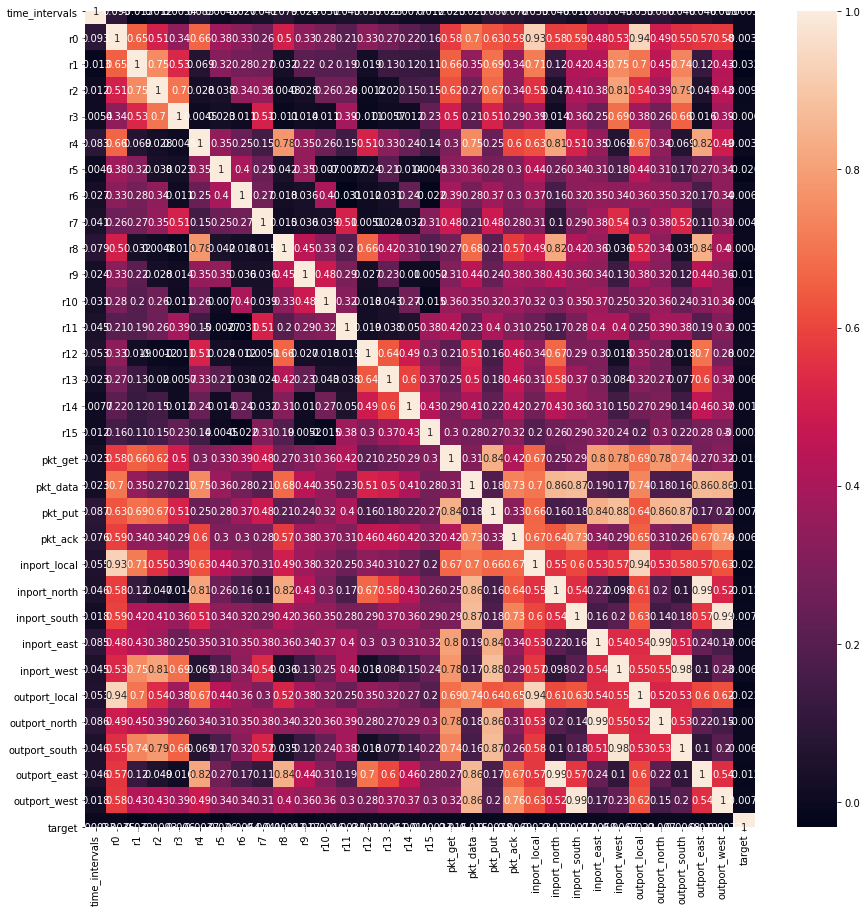

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [52]:
train_X = df.drop(columns=['target','time_intervals'])
train_X

,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,...,inport_local,inport_north,inport_south,inport_east,inport_west,outport_local,outport_north,outport_south,outport_east,outport_west
0,6,1,1,1,5,5,5,6,0,0,...,6,5,15,1,3,6,1,3,5,15
1,7,8,1,1,5,11,5,6,0,6,...,13,20,16,4,3,12,5,3,20,16
2,6,6,0,0,7,5,0,0,12,5,...,12,20,0,4,5,12,3,6,20,0
3,6,0,0,0,6,0,0,0,6,0,...,6,10,0,2,0,6,2,0,10,0
4,6,1,1,0,5,5,6,0,0,0,...,6,5,10,1,2,6,1,2,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63041,6,6,0,0,0,0,0,0,0,0,...,6,0,6,0,0,6,0,0,0,6
63042,7,7,7,0,0,0,0,0,0,0,...,7,0,2,0,12,7,0,12,0,2
63043,11,11,11,0,0,0,6,0,0,0,...,11,0,10,6,12,11,6,12,0,10
63044,6,0,0,0,6,6,6,0,0,0,...,6,6,12,0,0,6,0,0,6,12


In [12]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.272727,0.041667,0.052632,0.055556,0.277778,0.277778,0.3125,0.461538,0.000000,0.000000,...,0.260870,0.125,0.441176,0.027778,0.088235,0.250000,0.027778,0.083333,0.131579,0.441176
1,0.318182,0.333333,0.052632,0.055556,0.277778,0.611111,0.3125,0.461538,0.000000,0.352941,...,0.565217,0.500,0.470588,0.111111,0.088235,0.500000,0.138889,0.083333,0.526316,0.470588
2,0.272727,0.250000,0.000000,0.000000,0.388889,0.277778,0.0000,0.000000,0.705882,0.294118,...,0.521739,0.500,0.000000,0.111111,0.147059,0.500000,0.083333,0.166667,0.526316,0.000000
3,0.272727,0.000000,0.000000,0.000000,0.333333,0.000000,0.0000,0.000000,0.352941,0.000000,...,0.260870,0.250,0.000000,0.055556,0.000000,0.250000,0.055556,0.000000,0.263158,0.000000
4,0.272727,0.041667,0.052632,0.000000,0.277778,0.277778,0.3750,0.000000,0.000000,0.000000,...,0.260870,0.125,0.294118,0.027778,0.058824,0.250000,0.027778,0.055556,0.131579,0.294118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63041,0.272727,0.250000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.260870,0.000,0.176471,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.176471
63042,0.318182,0.291667,0.368421,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.304348,0.000,0.058824,0.000000,0.352941,0.291667,0.000000,0.333333,0.000000,0.058824
63043,0.500000,0.458333,0.578947,0.000000,0.000000,0.000000,0.3750,0.000000,0.000000,0.000000,...,0.478261,0.000,0.294118,0.166667,0.352941,0.458333,0.166667,0.333333,0.000000,0.294118
63044,0.272727,0.000000,0.000000,0.000000,0.333333,0.333333,0.3750,0.000000,0.000000,0.000000,...,0.260870,0.150,0.352941,0.000000,0.000000,0.250000,0.000000,0.000000,0.157895,0.352941


In [13]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[ 0.64342116, -0.11156435,  0.33369098, ...,  0.24476247,
        -0.14071207,  0.18114517],
       [ 1.3566919 , -0.25606309,  0.10874555, ...,  0.29429598,
        -0.22607127,  0.49591998],
       [ 0.95308331, -0.34487963, -0.41334311, ...,  0.13929031,
        -0.07121494,  0.43308381],
       ...,
       [ 0.90899321,  0.55101854,  0.33056038, ...,  0.22814658,
        -0.01467781, -0.00733415],
       [ 0.50896114, -0.39364456,  0.28688616, ..., -0.07388414,
         0.02404644, -0.01993798],
       [ 0.68835921,  0.9653947 , -0.12016596, ...,  0.06583072,
        -0.07956083, -0.06945966]])

In [14]:
pca.explained_variance_ratio_

array([0.47937801, 0.17289989, 0.07714763, 0.05168603, 0.03665838,
       0.03025343, 0.02477539, 0.02134958, 0.01959332, 0.01466232,
       0.01242848, 0.00941357])

Text(0, 0.5, 'Variance')

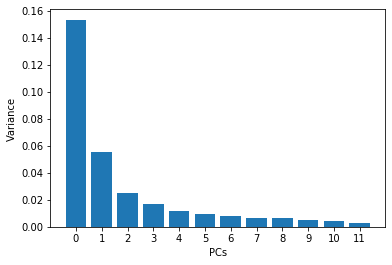

In [15]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [16]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.643421,-0.111564,0.333691,0.021704,-0.328037,-0.065919,0.418551,0.162862,0.117399,0.244762,-0.140712,0.181145
1,1.356692,-0.256063,0.108746,0.008615,-0.332759,0.237221,0.437638,-0.119838,0.740025,0.294296,-0.226071,0.495920
2,0.953083,-0.344880,-0.413343,-0.415315,0.086856,-0.268351,-0.078713,-0.079247,0.401697,0.139290,-0.071215,0.433084
3,0.351547,-0.266884,-0.259599,-0.247781,0.070511,-0.192265,0.016460,0.027667,-0.012581,0.105085,-0.008798,0.192513
4,0.486419,-0.146636,0.177358,-0.171405,-0.232098,0.120066,0.206973,0.194756,0.085310,0.186290,-0.049702,0.198728
...,...,...,...,...,...,...,...,...,...,...,...,...
63041,0.211384,-0.077546,0.242102,-0.162228,0.018694,0.118186,0.002382,-0.127686,-0.097901,-0.039091,0.077223,-0.019265
63042,0.467315,0.431652,0.170039,-0.137500,0.254716,0.046942,-0.102418,0.051340,0.018816,-0.181531,0.089960,0.008215
63043,0.908993,0.551019,0.330560,-0.246640,0.095521,0.261710,-0.092286,0.185415,-0.073238,0.228147,-0.014678,-0.007334
63044,0.508961,-0.393645,0.286886,-0.140732,-0.286199,0.104279,0.237941,0.210475,0.021583,-0.073884,0.024046,-0.019938


In [17]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,6,7,8,9,10,11,target
0,0.643421,-0.111564,0.333691,0.021704,-0.328037,-0.065919,0.418551,0.162862,0.117399,0.244762,-0.140712,0.181145,1
1,1.356692,-0.256063,0.108746,0.008615,-0.332759,0.237221,0.437638,-0.119838,0.740025,0.294296,-0.226071,0.495920,0
2,0.953083,-0.344880,-0.413343,-0.415315,0.086856,-0.268351,-0.078713,-0.079247,0.401697,0.139290,-0.071215,0.433084,0
3,0.351547,-0.266884,-0.259599,-0.247781,0.070511,-0.192265,0.016460,0.027667,-0.012581,0.105085,-0.008798,0.192513,1
4,0.486419,-0.146636,0.177358,-0.171405,-0.232098,0.120066,0.206973,0.194756,0.085310,0.186290,-0.049702,0.198728,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63041,0.211384,-0.077546,0.242102,-0.162228,0.018694,0.118186,0.002382,-0.127686,-0.097901,-0.039091,0.077223,-0.019265,1
63042,0.467315,0.431652,0.170039,-0.137500,0.254716,0.046942,-0.102418,0.051340,0.018816,-0.181531,0.089960,0.008215,1
63043,0.908993,0.551019,0.330560,-0.246640,0.095521,0.261710,-0.092286,0.185415,-0.073238,0.228147,-0.014678,-0.007334,1
63044,0.508961,-0.393645,0.286886,-0.140732,-0.286199,0.104279,0.237941,0.210475,0.021583,-0.073884,0.024046,-0.019938,1


In [18]:
final_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,target
0,1.000000e+00,2.045296e-16,6.587926e-15,9.134556e-15,2.291815e-15,-2.193195e-14,-4.265253e-15,2.233627e-14,-1.921883e-14,6.586391e-15,-7.179634e-15,1.239409e-13,-0.015212
1,2.045296e-16,1.000000e+00,-6.000229e-16,7.405366e-16,-4.412618e-15,5.005479e-16,1.749102e-15,-4.493193e-16,-1.210007e-14,1.002677e-14,9.376525e-16,2.093918e-15,-0.003316
2,6.587926e-15,-6.000229e-16,1.000000e+00,2.927068e-15,3.320939e-15,1.296581e-14,2.390032e-15,-6.920120e-15,-2.829595e-14,-3.812368e-16,-3.120129e-14,2.375633e-15,-0.004493
3,9.134556e-15,7.405366e-16,2.927068e-15,1.000000e+00,-1.025946e-15,-2.268493e-15,2.668812e-15,6.410079e-16,-2.057214e-15,2.015537e-16,9.928486e-16,-1.621483e-15,0.009904
4,2.291815e-15,-4.412618e-15,3.320939e-15,-1.025946e-15,1.000000e+00,1.113346e-15,-4.741181e-15,1.054101e-15,1.052898e-15,-2.160712e-15,-3.298611e-15,2.877537e-15,0.003835
5,-2.193195e-14,5.005479e-16,1.296581e-14,-2.268493e-15,1.113346e-15,1.000000e+00,6.014607e-16,-9.923408e-16,1.368707e-15,-6.210571e-16,-8.024239e-16,9.550191e-15,-0.012129
6,-4.265253e-15,1.749102e-15,2.390032e-15,2.668812e-15,-4.741181e-15,6.014607e-16,1.000000e+00,1.058253e-15,-2.664266e-15,-2.414659e-15,-7.790207e-17,-1.212679e-15,-0.001013
7,2.233627e-14,-4.493193e-16,-6.920120e-15,6.410079e-16,1.054101e-15,-9.923408e-16,1.058253e-15,1.000000e+00,-4.306393e-15,-2.742398e-15,1.587533e-15,-1.333485e-14,0.012945
8,-1.921883e-14,-1.210007e-14,-2.829595e-14,-2.057214e-15,1.052898e-15,1.368707e-15,-2.664266e-15,-4.306393e-15,1.000000e+00,-1.662696e-14,8.527181e-16,-2.413038e-14,-0.022910
9,6.586391e-15,1.002677e-14,-3.812368e-16,2.015537e-16,-2.160712e-15,-6.210571e-16,-2.414659e-15,-2.742398e-15,-1.662696e-14,1.000000e+00,-9.782629e-16,1.322186e-14,0.002580


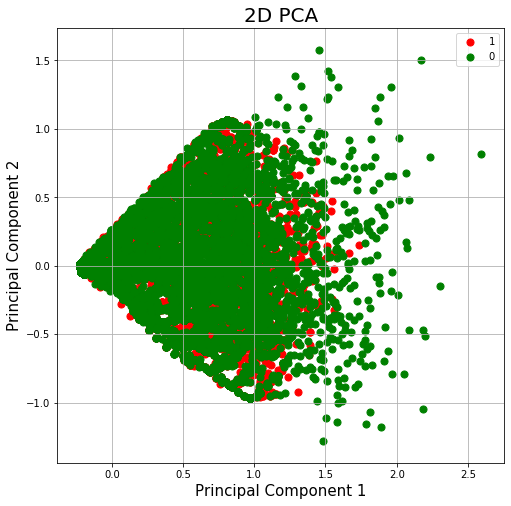

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [23]:
train_Y = df['target']

In [24]:
train_Y.value_counts()

1    31529
0    31517
Name: target, dtype: int64

#### machine learning models

In [25]:
X_train, X_test, y_train, y_test = train_test_split(principal_df, train_Y, test_size=0.3, random_state=0, shuffle = True)

In [26]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [27]:
logit_model=sm.Logit(train_Y,train_X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.685953
         Iterations: 35
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.010      
Dependent Variable: target           AIC:              86547.2354 
Date:               2020-05-02 13:12 BIC:              86791.6292 
No. Observations:   63046            Log-Likelihood:   -43247.    
Df Model:           26               LL-Null:          -43700.    
Df Residuals:       63019            LLR p-value:      1.7437e-174
Converged:          0.0000           Scale:            1.0000     
No. Iterations:     35.0000                                       
------------------------------------------------------------------
     Coef.     Std.Err.     z    P>|z|      [0.025       0.975]   
------------------------------------------------------------------
0   226.9735         nan     nan    nan           nan          nan
1   -30.4070         nan     nan    nan           nan          nan
2   -23.7206         n

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [28]:
logreg = LogisticRegression(C=1,penalty='l2',random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = logreg.predict(X_test)
print('Accuracy {:.2f}'.format(accuracy_score(y_test,y_pred)))
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Accuracy 0.50
Train Prediction Score 50.419196954590774
Test Prediction  50.126890134292054


In [30]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2479 6924]
 [2509 7002]]


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.26      0.34      9403
           1       0.50      0.74      0.60      9511

    accuracy                           0.50     18914
   macro avg       0.50      0.50      0.47     18914
weighted avg       0.50      0.50      0.47     18914



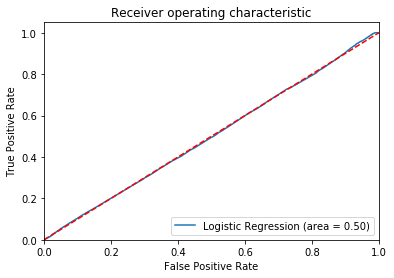

In [32]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [33]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
y_pred_knn= knn.predict(X_test)

In [35]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 53.75464515544276
Test Prediction  49.730358464629376


In [36]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

[[4141 5262]
 [4246 5265]]


In [37]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.49      0.44      0.47      9403
           1       0.50      0.55      0.53      9511

    accuracy                           0.50     18914
   macro avg       0.50      0.50      0.50     18914
weighted avg       0.50      0.50      0.50     18914



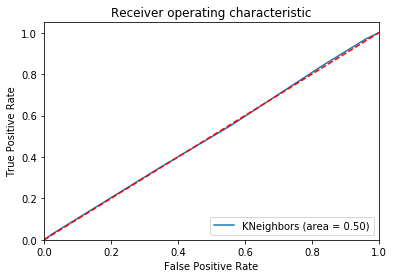

In [38]:
logit_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [39]:
#supportvectormachines
from sklearn.svm import SVC

In [ ]:
ksvc = SVC(kernel = 'rbf',random_state = 42,probability=True)
ksvc.fit(X_train,y_train)

In [ ]:
y_pred_ksvc= ksvc.predict(X_test)

In [ ]:
ksvc_score_train = ksvc.score(X_train,y_train)
print("Train Prediction Score",ksvc_score_train*100)
ksvc_score_test = accuracy_score(y_test,y_pred_ksvc)
print("Test Prediction Score",ksvc_score_test*100)

In [ ]:
cm = confusion_matrix(y_test, y_pred_ksvc)
print(cm)

In [ ]:
print(classification_report(y_test,y_pred_ksvc))

In [40]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [41]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
y_pred_nb= nb.predict(X_test)

In [43]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 50.02945708329557
Test Prediction Score 49.915406577138626


In [44]:
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)

[[2216 7187]
 [2286 7225]]


In [45]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.49      0.24      0.32      9403
           1       0.50      0.76      0.60      9511

    accuracy                           0.50     18914
   macro avg       0.50      0.50      0.46     18914
weighted avg       0.50      0.50      0.46     18914



In [46]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [47]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=10, validation_split=0.4 )

Train on 26479 samples, validate on 17653 samples
Epoch 1/10
26479/26479 [==============================] - 4s 146us/step - loss: 0.6948 - accuracy: 0.5023 - val_loss: 0.6938 - val_accuracy: 0.4975
Epoch 2/10
26479/26479 [==============================] - 3s 109us/step - loss: 0.6934 - accuracy: 0.5033 - val_loss: 0.6935 - val_accuracy: 0.4975
Epoch 3/10
26479/26479 [==============================] - 3s 107us/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6933 - val_accuracy: 0.4983
Epoch 4/10
26479/26479 [==============================] - 3s 108us/step - loss: 0.6932 - accuracy: 0.5041 - val_loss: 0.6934 - val_accuracy: 0.4979
Epoch 5/10
26479/26479 [==============================] - 3s 100us/step - loss: 0.6932 - accuracy: 0.5042 - val_loss: 0.6933 - val_accuracy: 0.4973
Epoch 6/10
26479/26479 [==============================] - 3s 106us/step - loss: 0.6932 - accuracy: 0.5025 - val_loss: 0.6933 - val_accuracy: 0.4973
Epoch 7/10
26479/26479 [==============================] - 3s 1

In [48]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(4, activation='relu', input_shape=(n_cols,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=20, validation_split=0.4 )

Train on 26479 samples, validate on 17653 samples
Epoch 1/20
26479/26479 [==============================] - 3s 112us/step - loss: 0.2500 - accuracy: 0.5006 - val_loss: 0.2500 - val_accuracy: 0.4985
Epoch 2/20
26479/26479 [==============================] - 2s 88us/step - loss: 0.2500 - accuracy: 0.5027 - val_loss: 0.2500 - val_accuracy: 0.4985
Epoch 3/20
26479/26479 [==============================] - 2s 88us/step - loss: 0.2500 - accuracy: 0.5025 - val_loss: 0.2500 - val_accuracy: 0.4985
Epoch 4/20
26479/26479 [==============================] - 3s 97us/step - loss: 0.2500 - accuracy: 0.4990 - val_loss: 0.2500 - val_accuracy: 0.4985
Epoch 5/20
26479/26479 [==============================] - 2s 90us/step - loss: 0.2500 - accuracy: 0.5028 - val_loss: 0.2500 - val_accuracy: 0.4985
Epoch 6/20
26479/26479 [==============================] - 3s 95us/step - loss: 0.2500 - accuracy: 0.5028 - val_loss: 0.2500 - val_accuracy: 0.4985
Epoch 7/20
26479/26479 [==============================] - 3s 97us/s

In [49]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=20, validation_split=0.4 )

Train on 26479 samples, validate on 17653 samples
Epoch 1/20
26479/26479 [==============================] - 3s 115us/step - loss: 0.2502 - accuracy: 0.5044 - val_loss: 0.2499 - val_accuracy: 0.5108
Epoch 2/20
26479/26479 [==============================] - 2s 94us/step - loss: 0.2501 - accuracy: 0.4988 - val_loss: 0.2499 - val_accuracy: 0.5098
Epoch 3/20
26479/26479 [==============================] - 3s 99us/step - loss: 0.2501 - accuracy: 0.4982 - val_loss: 0.2499 - val_accuracy: 0.5056
Epoch 4/20
26479/26479 [==============================] - 3s 95us/step - loss: 0.2501 - accuracy: 0.4976 - val_loss: 0.2499 - val_accuracy: 0.5054
Epoch 5/20
26479/26479 [==============================] - 3s 99us/step - loss: 0.2501 - accuracy: 0.4993 - val_loss: 0.2499 - val_accuracy: 0.5038
Epoch 6/20
26479/26479 [==============================] - 3s 95us/step - loss: 0.2500 - accuracy: 0.4998 - val_loss: 0.2499 - val_accuracy: 0.5041
Epoch 7/20
26479/26479 [==============================] - 3s 95us/s

In [50]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(16, activation='relu', input_shape=(n_cols,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=20, validation_split=0.4 )

Train on 26479 samples, validate on 17653 samples
Epoch 1/20
26479/26479 [==============================] - 3s 127us/step - loss: 0.2500 - accuracy: 0.5005 - val_loss: 0.2500 - val_accuracy: 0.4999
Epoch 2/20
26479/26479 [==============================] - 2s 94us/step - loss: 0.2500 - accuracy: 0.5022 - val_loss: 0.2500 - val_accuracy: 0.5007
Epoch 3/20
26479/26479 [==============================] - 3s 96us/step - loss: 0.2500 - accuracy: 0.5008 - val_loss: 0.2500 - val_accuracy: 0.4994
Epoch 4/20
26479/26479 [==============================] - 3s 96us/step - loss: 0.2500 - accuracy: 0.5022 - val_loss: 0.2500 - val_accuracy: 0.4995
Epoch 5/20
26479/26479 [==============================] - 3s 97us/step - loss: 0.2500 - accuracy: 0.5019 - val_loss: 0.2500 - val_accuracy: 0.4995
Epoch 6/20
26479/26479 [==============================] - 3s 100us/step - loss: 0.2500 - accuracy: 0.5019 - val_loss: 0.2500 - val_accuracy: 0.4993
Epoch 7/20
26479/26479 [==============================] - 3s 98us/

In [51]:
principal_df[principal_df.duplicated()].shape

(58014, 12)